In [1]:
import pickle
from itertools import product
from pathlib import Path
from random import choices

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import seaborn as sns

from eval import (
    Episode,
    Study,
    number_of_better_final_beams,
    plot_beam_parameters_on_screen,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_screen_image,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
    problem_aligned,
    screen_extent,
)

In [2]:
plt.style.use(["science", "nature"])
FIG_DIR = "figures/bo_vs_rl"

In [3]:
rl_feedback = Study.load(
    "data/bo_vs_rl/simulation/rl_feedback_instant/", name="RLO Feedback Sim (instant)"
)
bo_feedback = Study.load(
    "data/bo_vs_rl/simulation/bo_feedback_instant/", name="BO Feedback Sim (instant)"
)
rl_feedback_continuous = Study.load(
    "data/bo_vs_rl/simulation/rl_feedback_continuous/",
    name="RLO Feedback Sim (continuous)",
)
bo_feedback_continuous = Study.load(
    "data/bo_vs_rl/simulation/bo_feedback_continuous/",
    name="BO Feedback Sim (continuous)",
)

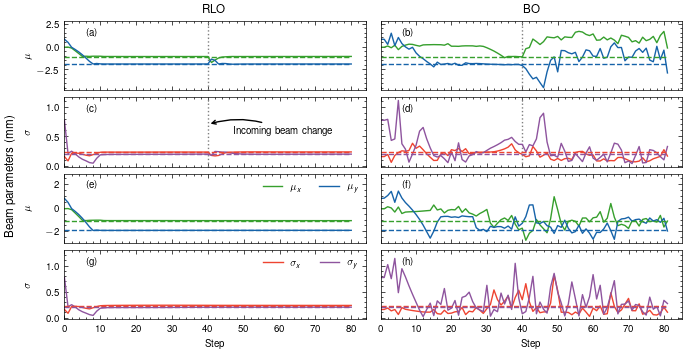

In [4]:
# New version with split beam paramters

trial_index_instant = 33  # 33, 42
trial_index_continuous = 33  # 33

fig, axs = plt.subplots(
    4, 2, figsize=(510 / 72.72 * 1.0, 510 / 72.72 * 0.52), sharex="col", sharey="row"
)

# Instant feedback
rl_feedback.get_episodes_by_problem(trial_index_instant)[0].plot_beam_parameters(
    vertical_marker=(40, "Incoming beam change"),
    xlabel=False,
    ylabel=False,
    ax=axs[0, 0],
    mode="mu",
    legend=False,
)
rl_feedback.get_episodes_by_problem(trial_index_instant)[0].plot_beam_parameters(
    vertical_marker=(40, "Incoming beam change"),
    xlabel=False,
    ylabel=False,
    ax=axs[1, 0],
    mode="sigma",
    legend=False,
)
axs[1, 0].annotate(
    "Incoming beam change",
    (40, 0.7),
    (47, 0.6),
    ha="left",
    va="center",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"),
)
# axs[0, 0].set_title("(a)", loc="left")

bo_feedback.get_episodes_by_problem(trial_index_instant)[0].plot_beam_parameters(
    vertical_marker=(40, "Incoming beam change"),
    xlabel=False,
    ylabel=False,
    ax=axs[0, 1],
    mode="mu",
    legend=False,
)
bo_feedback.get_episodes_by_problem(trial_index_instant)[0].plot_beam_parameters(
    vertical_marker=(40, "Incoming beam change"),
    xlabel=False,
    ylabel=False,
    ax=axs[1, 1],
    mode="sigma",
    legend=False,
)
# axs[1, 0].set_title("(c)", loc="left")

rl_feedback_continuous.get_episodes_by_problem(trial_index_continuous)[
    0
].plot_beam_parameters(
    ax=axs[2, 0], xlabel=False, ylabel=False, mode="mu", legend=False
)
axs[2, 0].legend(ncol=2)

rl_feedback_continuous.get_episodes_by_problem(trial_index_continuous)[
    0
].plot_beam_parameters(
    ax=axs[3, 0], xlabel=False, ylabel=False, mode="sigma", legend=False
)
axs[3, 0].legend(ncol=2)

# axs[0, 1].set_title("(b)", loc="left")

bo_feedback_continuous.get_episodes_by_problem(trial_index_continuous)[
    0
].plot_beam_parameters(
    ax=axs[2, 1], xlabel=False, ylabel=False, mode="mu", legend=False
)
bo_feedback_continuous.get_episodes_by_problem(trial_index_continuous)[
    0
].plot_beam_parameters(
    ax=axs[3, 1], xlabel=False, ylabel=False, mode="sigma", legend=False
)
# axs[1, 1].set_title("(d)", loc="left")
# [ax.get_legend_handles_labels() for ax in fig.axes]
# lines_labels = [ax.get_legend_handles_labels() for ax in [axs[0, 0], axs[3, 0]]]
# handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# # handles, labels = axs[0, 0].get_legend_handles_labels()
# fig.legend(
#     handles,
#     labels,
#     ncol=len(handles),
#     frameon=True,
#     edgecolor="inherit",
#     loc="lower center",
#     bbox_to_anchor=(0.5, -0.072),
# )
for ax in axs.flatten():
    ax.set_xlim(0, None)

for ax in [axs[0, 0], axs[0, 1]]:
    ax.set_ylim(-4.8, 2.8)
for ax in [axs[2, 0], axs[2, 1]]:
    ax.set_ylim(-3, 2.9)
for ax in [axs[3, 0], axs[3, 1]]:
    ax.set_ylim(None, 1.3)
axs[0, 0].set_title("RLO")
axs[0, 1].set_title("BO")
for ax in [axs[0, 0], axs[2, 0]]:
    ax.set_ylabel(r"$\mu$")
for ax in [axs[1, 0], axs[3, 0]]:
    ax.set_ylabel(r"$\sigma$")
subfig_names = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]
for idx, ax in enumerate(axs.flatten()):
    ax.text(x=0.07, y=0.80, s=subfig_names[idx], transform=ax.transAxes)
for ax in [axs[3, 0], axs[3, 1]]:
    ax.set_xlabel("Step")
fig.supylabel("Beam parameters (mm)")
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0.1)
fig.align_ylabels(axs[:, 0])
fig.savefig(f"{FIG_DIR}/feedback_example_new.pdf")